# Introducing

Name    : Azkia Mudrikah  
Batch   : 036 RMT  
Task    : Non Graded Challenge ML Problem Framing  
Dataset : Health insurance  
Objective: This program was created to predict the estimated cost for insurance based on cost data from some members of health insurance.

# Defining the Problem Statements

```Problem Statement```  
The goal is to find the best insurance with the best price among existing data. We eant to find ffordable insurance costs but with the best service. The desired insurance can be achieved by analyzing the available data.

# Data Understanding

## Dataset Description  
Dataset contain more than 1000 datas beneficiary of insurance about factors that affect insurance cost.
## Context  
Predict cost insurance through machine learning.
## Content  
Dataset contain column with data of gender, age, children, and others that affect insurance cost.
## Columns
1. Age = age of beneficiary
2. Sex = gender of beneficiary
3. Bmi = Body Mass Index
4. Children = Number of dependents
5. Smoker = Smoker or not smoker
6. Region = residential of beneficiary in the U.S
7. Charges = individual medical cost  
## Determine the Machine Learning Model Mode
We want to predict a price, in this case we predict insurance cost, so the machine learning model used is Linear Regression.

# Import Libraries 

This cell code is use for importing all of the libraries that will be needed to run the program.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import kendalltau, pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle 
import json


# Data Loading

This cell code is use for load the data which will be analyzed.

In [2]:
df_ori = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv')
df = df_ori.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Checking the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The result from the checking data:  
1. There are 7 columns and 1338 rows in the dataframe.
2. Dataframe has no missing value.
3. All of the data types are match their values

# Data Cleaning

Data cleaning is carried out to remove duplicates data, checking missing value, etc. Since our data has no missing value, we will do drop duplicates value only.

In [4]:
df.duplicated().sum()

1

From the result we know that there is one duplicated data, we don't want to there is duplicated in our data, so the duplicate data will be deleted. 

In [5]:
df.drop_duplicates(inplace=True)

After deleted duplicate data, do the re-check to make sure that duplicate data already cleared.

In [6]:
df.duplicated().sum()

0

From the last output, we know that the duplicate data were successfully cleared.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


From the output above we know that:  
1. Range of age is between 18-64 years old.
2. Range of charges is $1211 - $63770.

# Exploratory Data Analysis (EDA)

Checking the distribution of the charges using histogram and scatter plot.

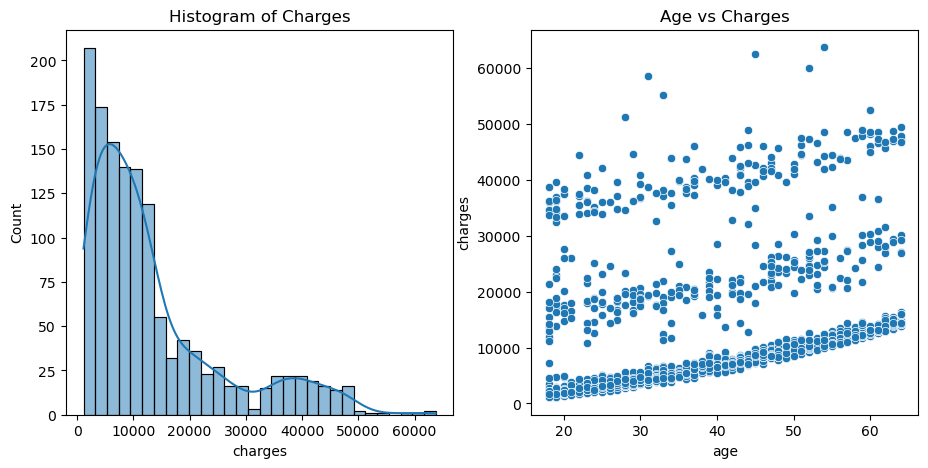

In [8]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.histplot(df.charges, kde=True, bins=30)
plt.title('Histogram of Charges')

plt.subplot(1,2,2)
sns.scatterplot(x = 'age', y = 'charges', data = df)
plt.title('Age vs Charges')
plt.show()

The histogram shows that the data were gathered on the left with the tail pointing to the right, it called positively skewed, the data is not normally distributed.  
The distribution of data in the scatterplot shows that the older the age, the higher the cost of health insurance. Apart from that, there are also several outliers in the data.

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Simple analysis based on region.

In [10]:
#insert nunique in region into new variable
region_list = df['region'].unique()

#creating dictionary for new dataframe based on region
df_region={}

#looping to create new dataframe for every region
for region in region_list:
    df_region[region] = df[df['region'] == region]

In [11]:
#showing summary of dataframe for southwest only 
df_region['southwest'].describe()

,age,bmi,children,charges
count,325.000000,325.000000,325.000000,325.000000
mean,39.455385,30.596615,1.141538,12346.937377
std,13.959886,5.691836,1.275952,11557.179101
min,19.000000,17.400000,0.000000,1241.565000
25%,27.000000,26.900000,0.000000,4751.070000
50%,39.000000,30.300000,1.000000,8798.593000
75%,51.000000,34.600000,2.000000,13462.520000
max,64.000000,47.600000,5.000000,52590.829390


In [12]:
df_region['northwest'].describe()

,age,bmi,children,charges
count,324.000000,324.000000,324.000000,324.000000
mean,39.259259,29.195494,1.151235,12450.840844
std,14.028302,5.144127,1.171897,11073.125699
min,19.000000,17.385000,0.000000,1621.340200
25%,26.000000,25.745000,0.000000,4733.635288
50%,39.000000,28.880000,1.000000,8976.977250
75%,51.250000,32.775000,2.000000,14788.747863
max,64.000000,42.940000,5.000000,60021.398970


In [13]:
df_region['southeast'].describe()

,age,bmi,children,charges
count,364.000000,364.000000,364.000000,364.000000
mean,38.939560,33.355989,1.049451,14735.411438
std,14.164585,6.477648,1.177276,13971.098589
min,18.000000,19.800000,0.000000,1121.873900
25%,26.750000,28.572500,0.000000,4440.886200
50%,39.000000,33.330000,1.000000,9294.131950
75%,51.000000,37.812500,2.000000,19526.286900
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
df_region['northeast'].describe()

,age,bmi,children,charges
count,324.000000,324.000000,324.000000,324.000000
mean,39.268519,29.173503,1.046296,13406.384516
std,14.069007,5.937513,1.198949,11255.803066
min,18.000000,15.960000,0.000000,1694.796400
25%,27.000000,24.866250,0.000000,5194.322288
50%,39.500000,28.880000,1.000000,10057.652025
75%,51.000000,32.893750,2.000000,16687.364100
max,64.000000,48.070000,5.000000,58571.074480


The highest charges based on region from the summary dataframe results above are in the Southeast region, which is $14735.41, while the lowest charges are $12346.94 in the Southwest region. These results can be used as consideration to determine the right place to live because where you live affects the insurance costs paid.

The next step is simple analysis based on gender

In [15]:
#insert nunique in sex into new variable
gender_list = df['sex'].unique()

#creating dictionary for new dataframe based on gender
gender={}

#looping to create new dataframe for every gender
for sex in gender_list:
    gender[sex] = df[df['sex'] == sex]

In [16]:
gender['female'].describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [17]:
gender['male'].describe()

,age,bmi,children,charges
count,675.000000,675.000000,675.000000,675.000000
mean,38.946667,30.943652,1.117037,13974.998864
std,14.039584,6.144973,1.219132,12971.958663
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4654.022675
50%,39.000000,30.690000,1.000000,9377.904700
75%,51.000000,35.025000,2.000000,19006.685500
max,64.000000,53.130000,5.000000,62592.873090


The grouping results based on gender above show that the average insurance cost for men is higher than the insurance cost for women.

Simple analysis based on smoker or not smoker.

In [18]:
#insert nunique in smkoer into new variable
smoker_list = df['smoker'].unique()

#creating dictionary for new dataframe based on smoker
df_smoker = {}

#looping to create new dataframe for smkoer and not smoker
for smoker in smoker_list:
    df_smoker[smoker] = df[df['smoker'] == smoker]

In [19]:
df_smoker['yes'].describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [20]:
df_smoker['no'].describe()

,age,bmi,children,charges
count,1063.000000,1063.000000,1063.000000,1063.000000
mean,39.404516,30.651853,1.091251,8440.660307
std,14.076133,6.045956,1.218250,5992.973800
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,3988.883500
50%,40.000000,30.305000,1.000000,7345.726600
75%,52.000000,34.430000,2.000000,11363.019100
max,64.000000,53.130000,5.000000,36910.608030


The summary results based on smoking habits above show that the charges for smokers are equivalent to 4x the insurance charges for non-smokers. This could be a consideration for prospective insurance applicants to change their smoking habits.

# Feature Engineering

### Handling Cardinality

In [21]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,sex,2,"[female, male]"
1,smoker,2,"[yes, no]"
2,region,4,"[southwest, southeast, northwest, northeast]"


### Split between features (X) and target (y)

In [22]:
X = df.drop(['charges'], axis = 1)
y = df['charges']
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


### Split between train set and test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1069, 6)
Test Size (268, 6)


### Handling outliers

In [24]:
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])


skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,age,0.1,normal
1,bmi,0.3,normal
2,children,1.0,skewed


Kolom age dan bmi berdistribusi normal, sedangkan kolom children tidak berdistribusi normal.

In [25]:
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
    })
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,age,81.73,-3.64,0.00
1,bmi,48.95,12.31,0.28
2,children,8.00,-6.00,0.00


Tidak terdapat outliers pada kolom age dan children, namun pada kolom bmi terdapat outliers sebanyak 0.28%.

In [26]:
lower_bound = 12.31
upper_bound = 48.95
outliers_bmi = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
outliers_bmi

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


Outliers di atas memperlihatkan bahwa outliers pada dataframe ini tidak dapat didefinisikan apakah outliers diakibatkan oleh salah satu faktor yang terdapat dalam dataframe atau tidak. Selain itu, outliers yang terdapat dalam dataframe ini jumlahnya sangat sedikit sehingga tidak mendominasi data yang ada. Lebih jauh lagi, nilai BMI yang dianggap outliers ini merupakan fenomena nyata yang ada dalam kehidupan, apabila outliers ini dihapus dapat mengakibatkan biasnya hasil analisis pada data dengan kasus serupa. Berdasarkan alasan tersebut, outliers pada BMI dipertahankan.

# Missing value

In [27]:
X_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [28]:
X_test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [29]:
y_train.isnull().sum()

0

In [30]:
y_test.isnull().sum()

0

Hasil pemeriksaan nilai missing value di atas menunjukkan bahwa tidak terdapat missing value dalam data, sehingga kita bisa melanjutkan analisis ke tahap berikutnya.

### Split between numerical and categorical columns, for scaling and encoding 

In [31]:
num_col = ['age', 'bmi', 'children']
cat_col = ['sex','smoker','region']

print(f'numerical : {num_col}')
print(f'categorical: {cat_col}')

numerical : ['age', 'bmi', 'children']
categorical: ['sex', 'smoker', 'region']


In [32]:
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

In [33]:
print(X_train_num.shape)
print(X_test_num.shape)
print(X_train_cat.shape)
print(X_test_cat.shape)

(1069, 3)
(268, 3)
(1069, 3)
(268, 3)


In [34]:
X_train_num.head()

,age,bmi,children
161,18,36.850,0
1033,18,21.565,0
151,48,29.700,0
760,22,34.580,2
362,19,21.700,0


In [35]:
X_train_cat.head()

,sex,smoker,region
161,female,yes,southeast
1033,male,yes,northeast
151,male,no,southeast
760,female,no,northeast
362,female,yes,southwest


# Feature Selection

In [36]:
X_train

,age,sex,bmi,children,smoker,region
161,18,female,36.850,0,yes,southeast
1033,18,male,21.565,0,yes,northeast
151,48,male,29.700,0,no,southeast
760,22,female,34.580,2,no,northeast
362,19,female,21.700,0,yes,southwest
...,...,...,...,...,...,...
278,59,male,31.790,2,no,southeast
432,42,male,26.900,0,no,southwest
1284,61,male,36.300,1,yes,southwest
1266,55,female,30.500,0,no,southwest


Berdasarkan pengamatan pribadi, kolom-kolom di atas tidak ada yang perlu di drop. Mengingat pada bagian EDA, kolom-kolom categorical juga memiliki pengaruh terhadap charges namun hal tersebut perlu dibuktikan melalui perhitungan korelasi.

### Menghitung Korelasi

In [37]:
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,sex,ga ada korelasi
1,smoker,ada korelasi
2,region,ga ada korelasi


In [38]:
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,age,ada korelasi
1,bmi,ada korelasi
2,children,ada korelasi


Hasil perhitungan korelasi pada feature selection ini menunjukkan bahwa age, bmi, children, dan smoker memiliki korelasi terhadap charges. Selanjutnya, seluruh kolom yang memiliki korelasi dimasukkan ke model sedangkan kolom yang tidak berkorelasi, di drop.

In [39]:
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

In [40]:
X_train_cat_fix = X_train_cat.drop(['sex', 'region'], axis=1)
X_test_cat_fix = X_test_cat.drop(['sex', 'region'], axis=1)

# Feature Scaling

In [41]:
# define scaling metod
scaler = MinMaxScaler()

# .fit
scaler.fit(X_train_num)

# .transform
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [42]:
X_test_num

,age,bmi,children
937,39,24.225,5
729,41,36.080,1
1307,32,28.120,4
925,50,32.110,2
137,22,25.175,0
...,...,...,...
224,42,24.640,0
1245,28,24.300,5
1087,57,31.540,0
913,44,27.500,1


In [43]:
X_train_num_scaled

array([[0.        , 0.5517004 , 0.        ],
       [0.        , 0.13079994, 0.        ],
       [0.65217391, 0.35481206, 0.        ],
       ...,
       [0.93478261, 0.53655514, 0.2       ],
       [0.80434783, 0.37684153, 0.        ],
       [0.45652174, 0.36100785, 0.2       ]])

# Feature Encoding

encode dilakukan untuk....

In [44]:
X_train_cat_fix.smoker.unique()

array(['yes', 'no'], dtype=object)

In [45]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X_train_cat_fix)
X_train_cat_encoded = encoder.transform(X_train_cat_fix)
X_test_cat_encoded = encoder.transform(X_test_cat_fix)
X_train_cat_fix

,smoker
161,yes
1033,yes
151,no
760,no
362,yes
...,...
278,no
432,no
1284,yes
1266,no


In [46]:
X_test_cat_fix

,smoker
937,no
729,no
1307,yes
925,no
137,no
...,...
224,yes
1245,no
1087,no
913,no


In [47]:
X_train_cat_encoded

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

### Concat between numerical dan categorical

In [58]:
# Concat
X_train_final = np.concatenate([X_train_cat_encoded, X_train_num_scaled], axis=1)
X_test_final = np.concatenate([X_test_cat_encoded, X_test_num_scaled], axis=1)


# Model Definition

notes: 
1. Algoritma yang dipakai `LinearRegression`
 - alasannya? pake linear karena memprediksi harga 
2. Metrics yang dipakai `MeanAbsoluteError`
 - alasannya? disini di keep outliersnya karena cuma dikit dan outliersnya make sense jadi pake metrics mae

 apakah ada normal outliers yang harus di keep? kalo ada , pake apa

 apakah model kalian sedikit errror sudah berdampak? alo iya, paake apa

 apakah harga rumah selisih dikit aja matters? pake metrics apa?

evaluasi model pastikan ada yang sifatnya error dan skor

pilih 1 dari skor 1 dair eeror

pilih error mae, mse, atau rmse

skornya 1

kalo klsifikasi skornya banyak

In [51]:
#define model
model_lin = LinearRegression()

# Model Training

In [52]:
model_lin.fit(X_train_final,y_train)

LinearRegression()

# Model Evaluation

In [53]:
y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

print(y_pred_train)

[27645.96735108 23013.75663766  9921.83067698 ... 39238.87245202
 12002.05726973 31531.00487992]


In [54]:
y_train

161     36149.48350
1033    13747.87235
151      7789.63500
760      3925.75820
362     13844.50600
           ...     
278     12928.79110
432      5969.72300
1284    47403.88000
1266    10704.47000
1278    22462.04375
Name: charges, Length: 1069, dtype: float64

In [55]:
# Evaluate the model
print('Error - train:',mean_absolute_error(y_train, y_pred_train))
print('Error - test:',mean_absolute_error(y_test, y_pred_test))

Error - train: 4040.72071329855
Error - test: 4677.699014925793


# Model Saving for Inference

In [56]:
with open('model_lin.pkl','wb') as file_1: #wb = write binary
    pickle.dump(model_lin, file_1)

with open('model_scaler.pkl','wb') as file_2: #wb = write binary
    pickle.dump(scaler, file_2)

with open('model_encoder.pkl','wb') as file_3: #wb = write binary
    pickle.dump(encoder, file_3)

with open('num_col.txt','w') as file_4: #wb = write binary
    json.dump(num_col, file_4)

with open('cat_col.txt','w') as file_5: #wb = write binary
    json.dump(cat_col, file_5)

# Conclusion